In [1]:
!pip install spacy
!pip install nltk
!pip install SimpSom
!pip install gensim

  Created wheel for SimpSom: filename=SimpSOM-1.3.4-cp37-none-any.whl size=17086 sha256=be48891b77b7d5239545fab3a4c145298d1e5450693f6be04d987d63f0019b07
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSom


In [2]:
%cd "/content/drive/MyDrive/DSPM_Project"

/content/drive/MyDrive/DSPM_Project


In [3]:
!pwd

/content/drive/MyDrive/DSPM_Project


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
import SimpSOM as sps
from gensim.models import Word2Vec, KeyedVectors

In [5]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.decomposition import TruncatedSVD

# Load the Top Product Reviews Data and Create a Subset from one product

In [6]:
reviews= pd.read_json("top_prod_reviews.json",compression="gzip")
reviews.head()

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc
2543,1,0,A1SJGHZDQHVYWH,B000142FVW,Julie D. Cassetina,Doesnt match the regular color of the real pro...,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2544,3,0,A1EZAX4P346ABG,B000142FVW,James C. James,Not pigmented enough. Needed three coats and s...,Low pigment,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2545,4,0,A1AT61K23ZY13Z,B000142FVW,Amazon Customer,I really liked the color of this polish. It wa...,I really liked the color of this polish,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2546,5,0,A326K7TN4PZE82,B000142FVW,DJ Curtiss,"Opi is the best quality polish I've used, and ...",Sturdy and Pretty Colors,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2547,1,0,AHHXLXF3I7BWW,B000142FVW,Angelica,Its counterfeit :/,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...


In [7]:
prod3= reviews[reviews['asin']=='B00172O9NO']
prod3.head()

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc
173529,5,23,A1FZMDMDM9D81Z,B00172O9NO,The Cat&#039;s Meow,I love this facial mist by Mario Badescu! It's...,Fresh!,"['A refreshing, hydrating mist to use anywhere...",,"Mario Badescu Facial Spray with Aloe, Herbs a...","[B0017SWIU4, B07BSV1T35, B0014P8L9W, B07DYDD49...",524 in Beauty & Personal Care (,"[B07849F4R5, B076XKLQ2T, B07G1493ZM, B00LBHEP3...",$12.00,524,"'A refreshing, hydrating mist to use anywhere ..."
173530,5,0,A9U6XNKG8RYYI,B00172O9NO,Tise~,I use it as a facial spray at night and as a m...,I use it as a facial spray at night and ...,"['A refreshing, hydrating mist to use anywhere...",,"Mario Badescu Facial Spray with Aloe, Herbs a...","[B0017SWIU4, B07BSV1T35, B0014P8L9W, B07DYDD49...",524 in Beauty & Personal Care (,"[B07849F4R5, B076XKLQ2T, B07G1493ZM, B00LBHEP3...",$12.00,524,"'A refreshing, hydrating mist to use anywhere ..."
173531,5,0,ACXEUZEAZ276A,B00172O9NO,Amazon Customer,This beauty stays in my handbag to help rehydr...,this is just perfect. It refreshes my skin and...,"['A refreshing, hydrating mist to use anywhere...",,"Mario Badescu Facial Spray with Aloe, Herbs a...","[B0017SWIU4, B07BSV1T35, B0014P8L9W, B07DYDD49...",524 in Beauty & Personal Care (,"[B07849F4R5, B076XKLQ2T, B07G1493ZM, B00LBHEP3...",$12.00,524,"'A refreshing, hydrating mist to use anywhere ..."
173532,5,0,A7SJJ5JNG94XS,B00172O9NO,Amazon Customer,love it! keep it in my bag and spritz myself t...,love it! keep it in my bag and spritz ...,"['A refreshing, hydrating mist to use anywhere...",,"Mario Badescu Facial Spray with Aloe, Herbs a...","[B0017SWIU4, B07BSV1T35, B0014P8L9W, B07DYDD49...",524 in Beauty & Personal Care (,"[B07849F4R5, B076XKLQ2T, B07G1493ZM, B00LBHEP3...",$12.00,524,"'A refreshing, hydrating mist to use anywhere ..."
173533,5,0,A2TWZFOKWB0O29,B00172O9NO,Crystal Hernandez,Can you say miracle for my skin my skin is ver...,Miracle for my skin,"['A refreshing, hydrating mist to use anywhere...",,"Mario Badescu Facial Spray with Aloe, Herbs a...","[B0017SWIU4, B07BSV1T35, B0014P8L9W, B07DYDD49...",524 in Beauty & Personal Care (,"[B07849F4R5, B076XKLQ2T, B07G1493ZM, B00LBHEP3...",$12.00,524,"'A refreshing, hydrating mist to use anywhere ..."


In [8]:
prod3.shape

(6126, 16)

# Text Preparation

In [9]:
prod3['reviewText']= prod3['reviewText'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
nlp= spacy.load("en_core_web_sm")
nlp.Defaults.stop_words.add("facial")
nlp.Defaults.stop_words.add("spray")
nlp.Defaults.stop_words.add("mist")
nlp.Defaults.stop_words.add("mario")
nlp.Defaults.stop_words.add("badescu")
nlp.Defaults.stop_words.add("skin")
nlp.Defaults.stop_words.add("product")
nlp.Defaults.stop_words.add("products")

In [11]:
def remove_stopwords(text):
  '''
  Args

  text : a string of product review

  Return:

  tokens: a list of tokens without stopwords and punctutaions
  '''
  tokens=[]
  doc=nlp(text)
  for word in doc:
    if word.is_stop==False:
      if word.is_punct==False:
        if word.pos_=='ADJ' or word.pos_=="NOUN" or word.pos_=="VERB":
          tokens.append(word.text)
  
  return tokens

In [12]:
prod3['reviewsTokens']=prod3['reviewText'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# K-Means Clustering with Word2Vec Model

## Word2Vec Model

In [13]:
sent = [row for row in prod3['reviewsTokens'].to_list()]

In [14]:
wv_model= Word2Vec(min_count=5,window=4,size=300)

In [15]:
wv_model.build_vocab(sent)

In [16]:
wv_model.train(sent, total_examples= wv_model.corpus_total_words,epochs=30, report_delay=1)
wv_model.init_sims(replace=True)

In [17]:
wv_model.save("w2vModel_prod3.model")

In [18]:
word_vectors= Word2Vec.load("w2vModel_prod3.model").wv

In [19]:
word_vectors.vectors.shape

(1369, 300)

## K Means Clustering with Word2Vec

In [20]:
model_kmeans=KMeans(n_clusters=2, max_iter=10000, random_state=True, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [21]:
word_vectors.similar_by_vector(model_kmeans.cluster_centers_[0], topn=50,restrict_vocab=None)

[('exact', 0.940514326095581),
 ('disappoint', 0.9379125833511353),
 ('produce', 0.934934139251709),
 ('older', 0.9216790199279785),
 ('hyped', 0.9185928106307983),
 ('comments', 0.9180516004562378),
 ('tested', 0.9158099889755249),
 ('mother', 0.9143916964530945),
 ('search', 0.9124948978424072),
 ('samples', 0.9122572541236877),
 ('book', 0.9089068174362183),
 ('quarter', 0.9054259061813354),
 ('birthday', 0.9044948816299438),
 ('photo', 0.9033135175704956),
 ('opposite', 0.9017788171768188),
 ('zits', 0.8999792337417603),
 ('filled', 0.894506573677063),
 ('fewer', 0.8919343948364258),
 ('fair', 0.8910698294639587),
 ('returning', 0.8887037634849548),
 ('recent', 0.8866732716560364),
 ('soaked', 0.8864898681640625),
 ('cancer', 0.8831316828727722),
 ('arm', 0.8825122117996216),
 ('advertised', 0.8823010325431824),
 ('listen', 0.8819247484207153),
 ('pictures', 0.8800514936447144),
 ('description', 0.8759095668792725),
 ('changing', 0.8752049207687378),
 ('delivered', 0.87469452619552

In [22]:
positive_cluster_index = 1
positive_cluster_center = model_kmeans.cluster_centers_[positive_cluster_index]
negative_cluster_center = model_kmeans.cluster_centers_[1-positive_cluster_index]

In [23]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model_kmeans.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])
words['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model_kmeans.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [24]:
words.head(10)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,love,"[0.054054536, -0.039824, 0.021605821, 0.090243...",1,1,1.085381,1.085381
1,expect,"[-0.06700812, -0.018236598, 0.021113714, 0.069...",0,-1,1.149298,-1.149298
2,refreshing,"[-0.009741704, 0.013952433, 0.033470094, 0.001...",1,1,1.113319,1.113319
3,smells,"[0.06828068, 0.02422702, 0.057187192, -0.05174...",1,1,1.017230,1.017230
4,nice,"[-0.04043596, -0.008818817, 0.037602156, 0.061...",1,1,1.097610,1.097610
5,sprays,"[0.053206764, 0.02214973, 0.06405523, 0.027011...",1,1,0.970828,0.970828
6,purse,"[0.07565121, 0.008380029, 0.05446421, 0.142871...",1,1,1.007161,1.007161
7,sized,"[0.061913114, 0.029173922, 0.055918306, 0.1139...",0,-1,1.196492,-1.196492
8,looking,"[0.03614129, -0.049314924, 0.08394348, -0.0611...",1,1,1.049559,1.049559
9,summer,"[-0.0662204, 0.101047315, 0.07224134, 0.026967...",1,1,1.065589,1.065589


In [25]:
words[['words', 'sentiment_coeff']].to_csv('prod3_sentiment_dictionary.csv', index=False)

## TF-IDF Vectorizer and Word2Vec Vectors

In [26]:
prod3['token_sent']= prod3['reviewsTokens'].apply(lambda x: ' '.join(w for w in x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
tf= TfidfVectorizer(tokenizer=remove_stopwords)
tf.fit(prod3['reviewText'])
features=pd.Series(tf.get_feature_names())
transformed = tf.transform(prod3['reviewText'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [28]:
prod3_justtxt= prod3['token_sent'].reset_index().drop('index',axis=1)

In [29]:
def create_tfidf_dictionary(x, transformed_file, features):
    '''
    Return:

    create dictionary for each input sentence x, where each word has assigned its tfidf score
    
    Args:

    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer

    '''
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    '''
    Return:
    list: replacing each word with it's calculated tfidf dictionary with scores of each word

    Args:
    x - row of dataframe, containing sentences, and their indexes,
    transformed_file - all sentences transformed with TfidfVectorizer
    features - names of all words in corpus used in TfidfVectorizer
    '''
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.token_sent.split()))

In [30]:
replaced_tfidf_scores = prod3_justtxt.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)#this step takes around 3-4 minutes minutes to calculate

In [31]:
replaced_tfidf_scores

0       [0.14384660590286968, 0.45041268078504226, 0.1...
1       [0.19969344246136544, 0.3576564760316081, 0.21...
2       [0.1557477301823639, 0.2242495321936934, 0.248...
3       [0.13615069589496348, 0.3451754542465258, 0.29...
4       [0.263875825246971, 0.13023229880481388, 0.292...
                              ...                        
6121            [0.9362006743488761, 0.35146592629828227]
6122    [0.2149955597071886, 0.3445190396042633, 0.250...
6123    [0.1553665785354836, 0.26251613795377493, 0.18...
6124    [0.1720258920447141, 0.3759346694989794, 0.375...
6125    [0.25750358068082, 0.1616495972440982, 0.15168...
Length: 6126, dtype: object

In [32]:
def replace_sentiment_words(word, sentiment_dict):
    '''
    Return
    replacing each word with its associated sentiment score from sentiment dict

    Args:
    word: single token text
    sentiment_dict: Dictionary created with Word2Vec Model with K Means Clustering
    '''
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [33]:
sentiment_map = pd.read_csv('prod3_sentiment_dictionary.csv')
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [34]:
replaced_closeness_scores = prod3.token_sent.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split()))).reset_index()

## Prediction Using Sentiment Coefficients and TF-IDF Scores

In [35]:
prod3['rate']=prod3['overall'].apply(lambda x: 1 if x>3 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
replaced_closeness_scores=replaced_closeness_scores.drop('index',axis=1).squeeze()
prod1_reviews= prod3['reviewText'].reset_index().drop('index',axis=1).squeeze()
prod1_rate= prod3['rate'].reset_index().drop('index',axis=1).squeeze()

In [37]:
replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, prod1_reviews, prod1_rate]).T
replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence', 'sentiment']

In [38]:
replacement_df.head()

,sentiment_coeff,tfidf_scores,sentence,sentiment
0,"[1.0853811938791746, -1.1492975661110274, 1.11...","[0.14384660590286968, 0.45041268078504226, 0.1...",i love this facial mist by mario badescu! it's...,1
1,"[1.1673462474982024, 1.1458459299294674, 1.140...","[0.19969344246136544, 0.3576564760316081, 0.21...",i use it as a facial spray at night and as a m...,1
2,"[0.9673869996812434, 1.4170756085891307, 0, 1....","[0.1557477301823639, 0.2242495321936934, 0.248...",this beauty stays in my handbag to help rehydr...,1
3,"[1.0853811938791746, -1.1029119953340638, 1.19...","[0.13615069589496348, 0.3451754542465258, 0.29...",love it! keep it in my bag and spritz myself t...,1
4,"[-1.4109101747299142, 1.1185383255535568, -1.2...","[0.263875825246971, 0.13023229880481388, 0.292...",can you say miracle for my skin my skin is ver...,1


In [39]:
replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
replacement_df['prediction'] = (replacement_df.sentiment_rate>0).astype('int8')
replacement_df['sentiment'] = [1 if i==1 else 0 for i in replacement_df.sentiment]

In [40]:
replacement_df.head()

,sentiment_coeff,tfidf_scores,sentence,sentiment,sentiment_rate,prediction
0,"[1.0853811938791746, -1.1492975661110274, 1.11...","[0.14384660590286968, 0.45041268078504226, 0.1...",i love this facial mist by mario badescu! it's...,1,1.073106,1
1,"[1.1673462474982024, 1.1458459299294674, 1.140...","[0.19969344246136544, 0.3576564760316081, 0.21...",i use it as a facial spray at night and as a m...,1,1.351234,1
2,"[0.9673869996812434, 1.4170756085891307, 0, 1....","[0.1557477301823639, 0.2242495321936934, 0.248...",this beauty stays in my handbag to help rehydr...,1,-0.550113,0
3,"[1.0853811938791746, -1.1029119953340638, 1.19...","[0.13615069589496348, 0.3451754542465258, 0.29...",love it! keep it in my bag and spritz myself t...,1,2.792346,1
4,"[-1.4109101747299142, 1.1185383255535568, -1.2...","[0.263875825246971, 0.13023229880481388, 0.292...",can you say miracle for my skin my skin is ver...,1,0.255195,1


In [41]:
replacement_df.to_json('prod3_KmeansWord2Vec_predictions.json',compression='gzip')

## Evaluating the K-Means with Word2Vec Model for Product 2

In [42]:

acc= accuracy_score(replacement_df['sentiment'],replacement_df['prediction'])
precision= precision_score(replacement_df['sentiment'],replacement_df['prediction'])
recall= recall_score(replacement_df['sentiment'],replacement_df['prediction'])
f1= f1_score(replacement_df['sentiment'],replacement_df['prediction'])

In [43]:
acc

0.7959516813581456

In [44]:
precision

0.923721340388007

In [45]:
recall

0.8225363172359639

In [46]:
f1

0.8701973001038422

In [47]:
scores= [acc,precision,recall,f1]
with open("prod3_Kmeans_Word2Vec_scores.txt","w") as f:
  for i in scores:
    f.write("%.2f\n"%i)

# K-Means Clustering with Simple Self-Organized Maps for Product1

In [48]:
tf= TfidfVectorizer(tokenizer=remove_stopwords)
reviews_data= tf.fit_transform(prod3['reviewText'])
svd= TruncatedSVD(100,random_state=42)
reviews_de= svd.fit_transform(reviews_data)

In [49]:
net= sps.somNet(20,20,reviews_de,PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


In [50]:
net.train(0.01,5000)

Training SOM... done!


In [51]:
net.save('weightsSOM_prod3')

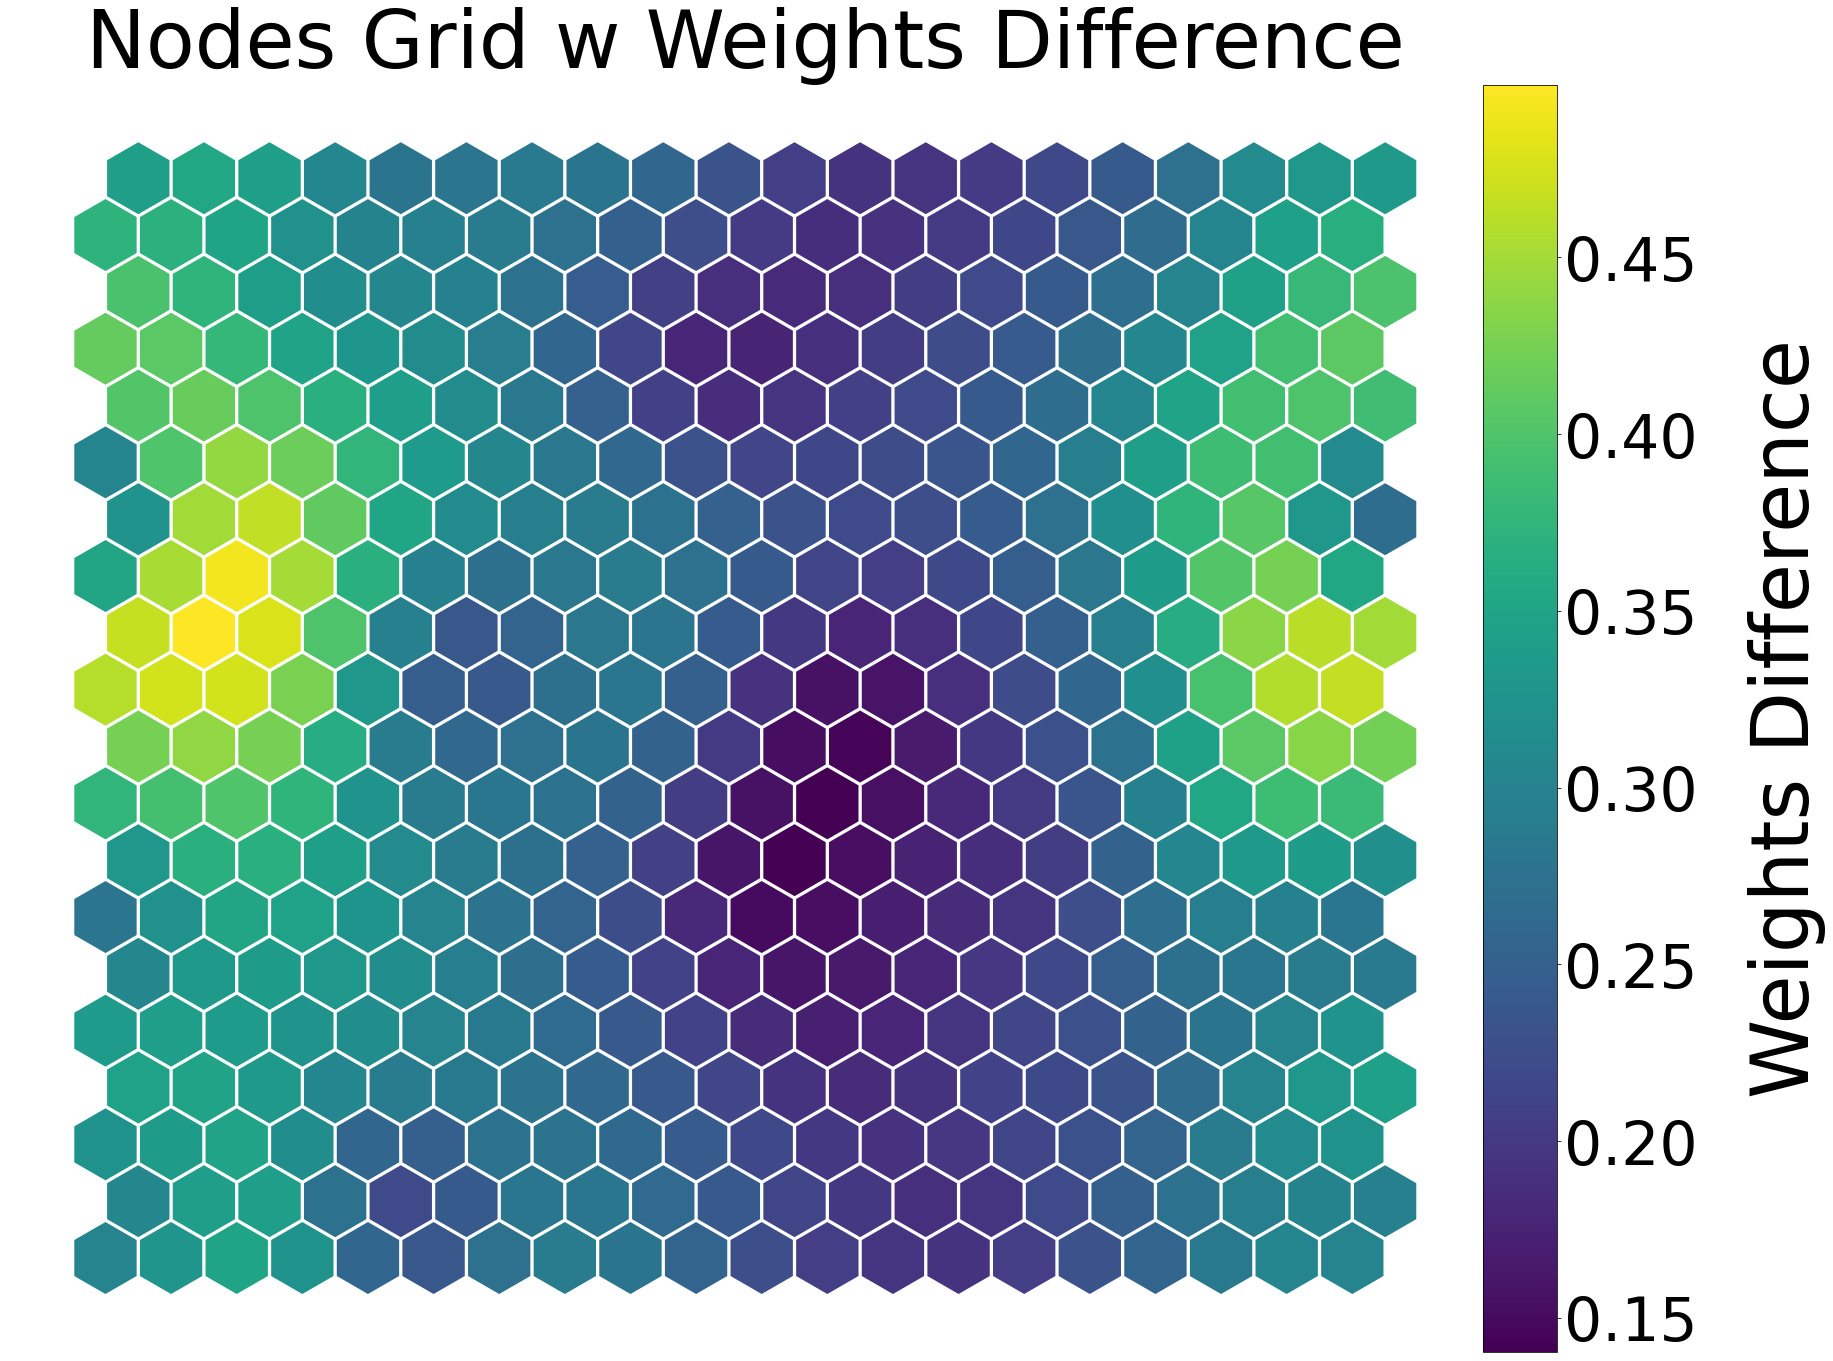

In [67]:
net.diff_graph()

In [53]:
prj= np.array(net.project(reviews_de))

<Figure size 432x288 with 0 Axes>

In [54]:
prod3_som= prod3[['reviewText','rate']].reset_index().drop('index',axis=1)
prod3_som.rename(columns={'rate':'sentiment'},inplace=True)
prod3_som.head()


,reviewText,sentiment
0,i love this facial mist by mario badescu! it's...,1
1,i use it as a facial spray at night and as a m...,1
2,this beauty stays in my handbag to help rehydr...,1
3,love it! keep it in my bag and spritz myself t...,1
4,can you say miracle for my skin my skin is ver...,1


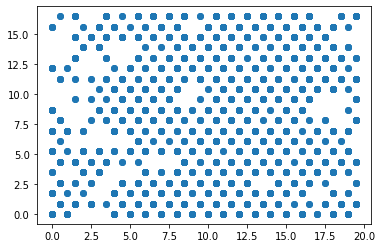

In [55]:
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [56]:
kmeans= KMeans(n_clusters=2,random_state=True).fit(prj)

In [57]:
prod3_som['prediction']=kmeans.labels_

In [58]:
prod3_som[prod3_som['prediction']==1].head()

,reviewText,sentiment,prediction
2,this beauty stays in my handbag to help rehydr...,1,1
4,can you say miracle for my skin my skin is ver...,1,1
10,pretty good for the price.,1,1
11,wow... sooo i had clear skin in hs but then st...,1,1
12,great buy thank you,1,1


In [59]:
prod3_som['sentiment']=prod3_som['sentiment'].apply(lambda x: 1 if x==1 else 0)

In [60]:
prod3_som.to_json('prod3_KmeansSOM.json',compression='gzip')

In [61]:
acc=accuracy_score(prod3_som['sentiment'],prod3_som['prediction'])

In [62]:
precision=precision_score(prod3_som['sentiment'],prod3_som['prediction'])

In [63]:
recall=recall_score(prod3_som['sentiment'],prod3_som['prediction'])

In [64]:
f1=f1_score(prod3_som['sentiment'],prod3_som['prediction'])

In [65]:
acc, precision,recall,f1

(0.410871694417238,
 0.8278145695364238,
 0.36808009422850413,
 0.5095801059926621)

In [66]:
scores= [acc,precision,recall,f1]
with open("prod3_Kmeans_SOM_scores.txt","w") as f:
  for i in scores:
    f.write("%.2f\n"%i)